# "Student" t-distribution

Visit [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for a quick review. The name is because of  the developer, William Sealy Gosset, who worked for Guinness and published under the pseudonym "Student".

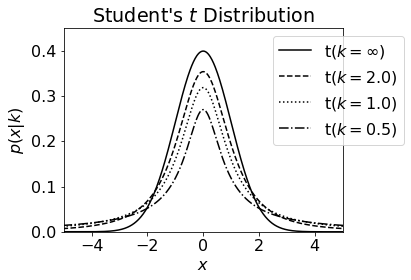

In [1]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import t as student_t
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 12, 10 
plt.rcParams['font.size'] = 16 

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
mu = 0
k_values = [1E10, 2, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend(bbox_to_anchor=(1.25, 1.0))
plt.show()

In [2]:
## Lets do an example, thanks to Prof. Cimbala


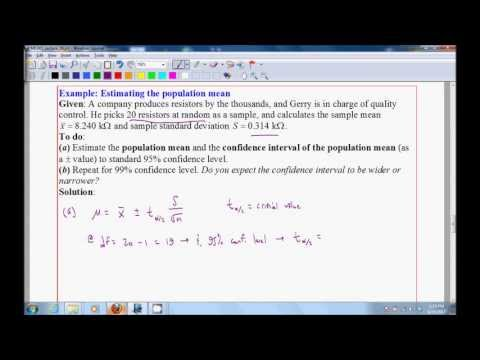

In [3]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('pVk3w9aaSSo')

In [4]:
# measured quantities:
x_mean = 8.240 # kOhm
Sx = 0.314 # kOhm
N = 20 # samples

# for the 95 confidence level
confidence_level = 0.95 # 95%
alpha = 1 - confidence_level
degrees_of_freedom = N - 1

In [5]:
# how to get values from the distribution? try to google it down:
# http://stackoverflow.com/questions/27315161/displaying-a-youtube-clip-in-python

In [6]:
#Student, n=999, p<0.05, 2-tail
#equivalent to Excel TINV(0.05,999)
print('Two tail problem:'); 
print(student_t.ppf(1-alpha/2.0, degrees_of_freedom))
t_value = student_t.ppf(1-alpha/2.0, degrees_of_freedom)

#Student, n=999, p<0.05%, Single tail
#equivalent to Excel TINV(2*0.05,999)
print('Single tail:')
print(student_t.ppf(1-alpha, degrees_of_freedom))

Two tail problem:
2.093024054408263
Single tail:
1.729132811521367


In [7]:
# the answer: 
# the population mean is 

print('Population mean is :')
print('{:.3f} +- {:.3f}'.format(x_mean, t_value*Sx/(np.sqrt(N))))

Population mean is :
8.240 +- 0.147


In [8]:
confidence_level = 0.99 # 95%
alpha = 1 - confidence_level
t_value = student_t.ppf(1-alpha/2.0, degrees_of_freedom)
print('t-value is higher {:.3f}'.format(t_value))
print('Population mean is :')
print('{:.3f} +- {:.3f}'.format(x_mean, t_value*Sx/(np.sqrt(N))))

t-value is higher 2.861
Population mean is :
8.240 +- 0.201
